In [1]:
import torch
import numpy as np
from torch.nn import Linear

import sys
sys.version

torch.manual_seed(1)

In [2]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

def forward(x):
    y = w * x + b
    return y


In [3]:
x = torch.tensor(2)
forward(x)

tensor(7., grad_fn=<AddBackward0>)

In [4]:
x = torch.tensor([[4], [7]])
forward(x)

tensor([[13],
        [22]], grad_fn=<AddBackward0>)

In [5]:
# Linear model

In [6]:
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [7]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [8]:
# Custom Models
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

X = torch.randn(100, 1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

Text(0.5, 0, 'x')

In [9]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.4114]], requires_grad=True) Parameter containing:
tensor([0.2438], requires_grad=True)
-0.4114351272583008 0.24377381801605225


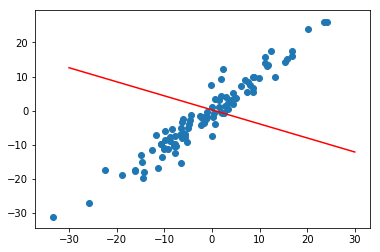

In [10]:
model = LR(1, 1)
print(model)
# print(list(model.parameters()))

[w, b] = model.parameters()
print(w, b)
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

def get_params():
    return (w[0][0].item(), b[0].item())

def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

plot_fit('Initial Model')

In [11]:
torch.manual_seed(1)
model = LR(1, 1)
x = torch.tensor([[1.0], [2.0]])
model.forward(x)

list(model.parameters())


[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [12]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [19]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # lr = 0.01 - not good


In [20]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 621155647488.0
epoch: 1 loss: 385064960000.0
epoch: 2 loss: 238708277248.0
epoch: 3 loss: 147979288576.0
epoch: 4 loss: 91734867968.0
epoch: 5 loss: 56867999744.0
epoch: 6 loss: 35253428224.0
epoch: 7 loss: 21854197760.0
epoch: 8 loss: 13547784192.0
epoch: 9 loss: 8398502400.0
epoch: 10 loss: 5206373376.0
epoch: 11 loss: 3227519232.0
epoch: 12 loss: 2000793984.0
epoch: 13 loss: 1240326016.0
epoch: 14 loss: 768899136.0
epoch: 15 loss: 476653504.0
epoch: 16 loss: 295485600.0
epoch: 17 loss: 183176528.0
epoch: 18 loss: 113554240.0
epoch: 19 loss: 70394200.0
epoch: 20 loss: 43638556.0
epoch: 21 loss: 27052284.0
epoch: 22 loss: 16770172.0
epoch: 23 loss: 10396118.0
epoch: 24 loss: 6444733.0
epoch: 25 loss: 3995202.0
epoch: 26 loss: 2476696.5
epoch: 27 loss: 1535349.0
epoch: 28 loss: 951792.0625
epoch: 29 loss: 590035.1875
epoch: 30 loss: 365775.96875
epoch: 31 loss: 226753.90625
epoch: 32 loss: 140571.78125
epoch: 33 loss: 87146.015625
epoch: 34 loss: 54026.4765625
epoch: 35 

Text(0.5, 0, 'epoch')

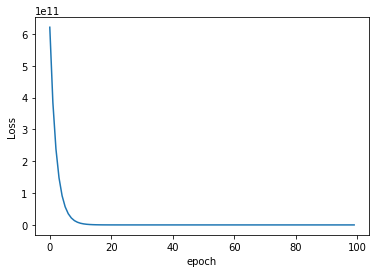

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

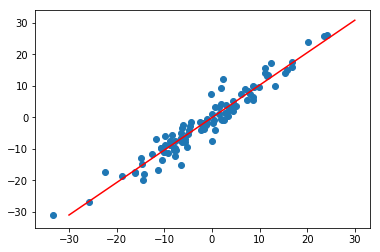

In [22]:
plot_fit("Trained Model")